In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.datasets import fetch_openml

# load the MNIST dataset
mnist_data = fetch_openml('mnist_784')

In [3]:
# using a smaller dataset
X = mnist_data['data'][:7000]
y = mnist_data['target'][:7000]

print(X.shape)
print(y.shape)

(7000, 784)
(7000,)


In [4]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6000, 784)
(6000,)
(1000, 784)
(1000,)


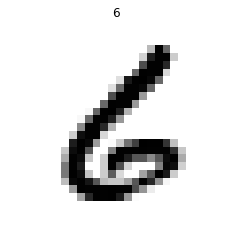

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

index = 2

# plot an example
def plot_example(X, y):
    plt.imshow(X.reshape(28, 28), cmap='binary')
    plt.axis(False)
    plt.title(f"{y}")

plot_example(X_train[index], y_train[index])
plt.show()

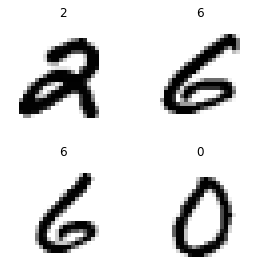

In [6]:
# plot a few examples
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i], y_train[i])

fig.tight_layout()
plt.show()

In [8]:
import numpy as np

def one_hot_encode(x, num_classes=10):
    x_one_hot = x.astype(int).reshape(-1)
    x_one_hot = np.eye(num_classes)[x_one_hot]
    return x_one_hot

# one-hot encode labels
y_train_one_hot = one_hot_encode(y_train)
y_test_one_hot = one_hot_encode(y_test)

In [9]:
# normalize the inputs
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [44]:
from models import Sequential
from layers import Linear, ReLU, Softmax, Tanh
from initializers import random_normal

# create the model
model = Sequential()
model.add(Linear(128, input_shape=(784,), kernel_initializer=random_normal))
model.add(ReLU())
model.add(Linear(64, kernel_initializer=random_normal))
model.add(ReLU())
model.add(Linear(10, kernel_initializer=random_normal))
model.add(Softmax())

In [45]:
from losses import CategoricalCrossentropy
from metrics import categorical_accuracy

# prepare the model for training
model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics={"acc": categorical_accuracy})

model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot);

loss=2.312178	val_loss=2.312694	acc=0.104833	val_acc=0.093000


In [ ]:
# train the model
model.train(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot, epochs=1000);

Epoch 01	loss=2.308852	val_loss=2.309411	acc=0.107500	val_acc=0.098000
Epoch 02	loss=2.305653	val_loss=2.306225	acc=0.112333	val_acc=0.107000
Epoch 03	loss=2.302542	val_loss=2.303110	acc=0.117833	val_acc=0.110000
Epoch 04	loss=2.299480	val_loss=2.300047	acc=0.123667	val_acc=0.117000
Epoch 05	loss=2.296448	val_loss=2.297017	acc=0.128333	val_acc=0.122000
Epoch 06	loss=2.293450	val_loss=2.294027	acc=0.134667	val_acc=0.133000
Epoch 07	loss=2.290454	val_loss=2.291052	acc=0.141500	val_acc=0.136000
Epoch 08	loss=2.287435	val_loss=2.288061	acc=0.148000	val_acc=0.152000
Epoch 09	loss=2.284379	val_loss=2.285035	acc=0.157667	val_acc=0.159000
Epoch 10	loss=2.281268	val_loss=2.281956	acc=0.165000	val_acc=0.168000
Epoch 11	loss=2.278084	val_loss=2.278818	acc=0.177167	val_acc=0.178000
Epoch 12	loss=2.274811	val_loss=2.275592	acc=0.187167	val_acc=0.192000
Epoch 13	loss=2.271445	val_loss=2.272272	acc=0.202000	val_acc=0.209000
Epoch 14	loss=2.267955	val_loss=2.268832	acc=0.222000	val_acc=0.229000
Epoch 

Epoch 118	loss=0.630762	val_loss=0.671893	acc=0.837167	val_acc=0.809000
Epoch 119	loss=0.624910	val_loss=0.666134	acc=0.838000	val_acc=0.811000
Epoch 120	loss=0.619207	val_loss=0.660513	acc=0.839167	val_acc=0.813000
Epoch 121	loss=0.613645	val_loss=0.655027	acc=0.839833	val_acc=0.814000
Epoch 122	loss=0.608221	val_loss=0.649675	acc=0.840833	val_acc=0.816000
Epoch 123	loss=0.602926	val_loss=0.644448	acc=0.842667	val_acc=0.816000
Epoch 124	loss=0.597760	val_loss=0.639344	acc=0.843000	val_acc=0.816000
Epoch 125	loss=0.592718	val_loss=0.634359	acc=0.845167	val_acc=0.817000
Epoch 126	loss=0.587795	val_loss=0.629493	acc=0.846500	val_acc=0.819000
Epoch 127	loss=0.582987	val_loss=0.624732	acc=0.847500	val_acc=0.819000
Epoch 128	loss=0.578289	val_loss=0.620075	acc=0.847667	val_acc=0.819000
Epoch 129	loss=0.573698	val_loss=0.615522	acc=0.848667	val_acc=0.821000
Epoch 130	loss=0.569211	val_loss=0.611064	acc=0.849667	val_acc=0.824000
Epoch 131	loss=0.564824	val_loss=0.606706	acc=0.850667	val_acc=0

Epoch 232	loss=0.356790	val_loss=0.398329	acc=0.903833	val_acc=0.878000
Epoch 233	loss=0.355789	val_loss=0.397380	acc=0.903833	val_acc=0.878000
Epoch 234	loss=0.354799	val_loss=0.396445	acc=0.904167	val_acc=0.878000
Epoch 235	loss=0.353818	val_loss=0.395522	acc=0.904000	val_acc=0.878000
Epoch 236	loss=0.352846	val_loss=0.394607	acc=0.904167	val_acc=0.878000
Epoch 237	loss=0.351883	val_loss=0.393707	acc=0.904333	val_acc=0.878000
Epoch 238	loss=0.350929	val_loss=0.392813	acc=0.904500	val_acc=0.879000
Epoch 239	loss=0.349984	val_loss=0.391929	acc=0.904333	val_acc=0.880000
Epoch 240	loss=0.349046	val_loss=0.391058	acc=0.904500	val_acc=0.880000
Epoch 241	loss=0.348118	val_loss=0.390196	acc=0.904667	val_acc=0.880000
Epoch 242	loss=0.347199	val_loss=0.389343	acc=0.905000	val_acc=0.880000
Epoch 243	loss=0.346287	val_loss=0.388500	acc=0.905167	val_acc=0.881000
Epoch 244	loss=0.345385	val_loss=0.387666	acc=0.905333	val_acc=0.881000
Epoch 245	loss=0.344490	val_loss=0.386844	acc=0.905500	val_acc=0

Epoch 346	loss=0.280867	val_loss=0.334750	acc=0.922667	val_acc=0.908000
Epoch 347	loss=0.280407	val_loss=0.334425	acc=0.922833	val_acc=0.908000
Epoch 348	loss=0.279949	val_loss=0.334101	acc=0.923000	val_acc=0.909000
Epoch 349	loss=0.279493	val_loss=0.333781	acc=0.923000	val_acc=0.909000
Epoch 350	loss=0.279039	val_loss=0.333463	acc=0.923000	val_acc=0.909000
Epoch 351	loss=0.278588	val_loss=0.333146	acc=0.923500	val_acc=0.909000
Epoch 352	loss=0.278138	val_loss=0.332835	acc=0.923667	val_acc=0.909000
Epoch 353	loss=0.277690	val_loss=0.332525	acc=0.924000	val_acc=0.910000
Epoch 354	loss=0.277244	val_loss=0.332214	acc=0.924000	val_acc=0.910000
Epoch 355	loss=0.276800	val_loss=0.331907	acc=0.924333	val_acc=0.910000
Epoch 356	loss=0.276358	val_loss=0.331604	acc=0.924333	val_acc=0.910000
Epoch 357	loss=0.275918	val_loss=0.331305	acc=0.924833	val_acc=0.911000
Epoch 358	loss=0.275480	val_loss=0.331005	acc=0.924833	val_acc=0.911000
Epoch 359	loss=0.275043	val_loss=0.330705	acc=0.924833	val_acc=0

Epoch 461	loss=0.237889	val_loss=0.307494	acc=0.936833	val_acc=0.916000
Epoch 462	loss=0.237577	val_loss=0.307314	acc=0.936833	val_acc=0.916000
Epoch 463	loss=0.237266	val_loss=0.307137	acc=0.936833	val_acc=0.916000
Epoch 464	loss=0.236956	val_loss=0.306959	acc=0.936833	val_acc=0.916000
Epoch 465	loss=0.236647	val_loss=0.306783	acc=0.936833	val_acc=0.916000
Epoch 466	loss=0.236338	val_loss=0.306609	acc=0.936833	val_acc=0.916000
Epoch 467	loss=0.236031	val_loss=0.306436	acc=0.937333	val_acc=0.916000
Epoch 468	loss=0.235723	val_loss=0.306262	acc=0.937333	val_acc=0.916000
Epoch 469	loss=0.235417	val_loss=0.306091	acc=0.937500	val_acc=0.916000
Epoch 470	loss=0.235111	val_loss=0.305920	acc=0.937500	val_acc=0.916000
Epoch 471	loss=0.234806	val_loss=0.305745	acc=0.937500	val_acc=0.915000
Epoch 472	loss=0.234502	val_loss=0.305575	acc=0.937500	val_acc=0.915000
Epoch 473	loss=0.234198	val_loss=0.305401	acc=0.937500	val_acc=0.915000
Epoch 474	loss=0.233895	val_loss=0.305228	acc=0.937500	val_acc=0

Epoch 575	loss=0.206341	val_loss=0.290173	acc=0.945500	val_acc=0.915000
Epoch 576	loss=0.206093	val_loss=0.290050	acc=0.945500	val_acc=0.915000
Epoch 577	loss=0.205846	val_loss=0.289923	acc=0.945500	val_acc=0.915000
Epoch 578	loss=0.205599	val_loss=0.289794	acc=0.945500	val_acc=0.915000
Epoch 579	loss=0.205353	val_loss=0.289665	acc=0.945500	val_acc=0.915000
Epoch 580	loss=0.205106	val_loss=0.289537	acc=0.945500	val_acc=0.915000
Epoch 581	loss=0.204861	val_loss=0.289408	acc=0.945667	val_acc=0.915000
Epoch 582	loss=0.204616	val_loss=0.289278	acc=0.945667	val_acc=0.915000
Epoch 583	loss=0.204371	val_loss=0.289151	acc=0.945667	val_acc=0.916000
Epoch 584	loss=0.204127	val_loss=0.289023	acc=0.945667	val_acc=0.916000
Epoch 585	loss=0.203883	val_loss=0.288898	acc=0.945667	val_acc=0.916000
Epoch 586	loss=0.203640	val_loss=0.288768	acc=0.945667	val_acc=0.916000
Epoch 587	loss=0.203397	val_loss=0.288645	acc=0.945833	val_acc=0.916000
Epoch 588	loss=0.203154	val_loss=0.288519	acc=0.946000	val_acc=0

Epoch 689	loss=0.180164	val_loss=0.276936	acc=0.951500	val_acc=0.921000
Epoch 690	loss=0.179951	val_loss=0.276837	acc=0.951500	val_acc=0.921000
Epoch 691	loss=0.179739	val_loss=0.276741	acc=0.952000	val_acc=0.921000
Epoch 692	loss=0.179528	val_loss=0.276644	acc=0.952000	val_acc=0.920000
Epoch 693	loss=0.179316	val_loss=0.276551	acc=0.952000	val_acc=0.920000
Epoch 694	loss=0.179105	val_loss=0.276448	acc=0.952167	val_acc=0.920000
Epoch 695	loss=0.178894	val_loss=0.276357	acc=0.952167	val_acc=0.921000
Epoch 696	loss=0.178683	val_loss=0.276258	acc=0.952333	val_acc=0.921000
Epoch 697	loss=0.178472	val_loss=0.276167	acc=0.952167	val_acc=0.921000
Epoch 698	loss=0.178262	val_loss=0.276066	acc=0.952500	val_acc=0.921000
Epoch 699	loss=0.178052	val_loss=0.275978	acc=0.952500	val_acc=0.921000
Epoch 700	loss=0.177842	val_loss=0.275875	acc=0.952500	val_acc=0.921000
Epoch 701	loss=0.177633	val_loss=0.275787	acc=0.953000	val_acc=0.921000
Epoch 702	loss=0.177424	val_loss=0.275690	acc=0.953000	val_acc=0

Epoch 803	loss=0.157456	val_loss=0.267218	acc=0.957167	val_acc=0.923000
Epoch 804	loss=0.157268	val_loss=0.267147	acc=0.957167	val_acc=0.923000
Epoch 805	loss=0.157080	val_loss=0.267076	acc=0.957167	val_acc=0.923000
Epoch 806	loss=0.156893	val_loss=0.266991	acc=0.957500	val_acc=0.923000
Epoch 807	loss=0.156706	val_loss=0.266920	acc=0.957500	val_acc=0.923000
Epoch 808	loss=0.156519	val_loss=0.266838	acc=0.957500	val_acc=0.923000
Epoch 809	loss=0.156332	val_loss=0.266769	acc=0.957667	val_acc=0.923000
Epoch 810	loss=0.156146	val_loss=0.266692	acc=0.957667	val_acc=0.923000
Epoch 811	loss=0.155960	val_loss=0.266622	acc=0.957833	val_acc=0.923000
Epoch 812	loss=0.155774	val_loss=0.266546	acc=0.958167	val_acc=0.923000
Epoch 813	loss=0.155588	val_loss=0.266470	acc=0.958167	val_acc=0.923000
Epoch 814	loss=0.155403	val_loss=0.266401	acc=0.958167	val_acc=0.923000
Epoch 815	loss=0.155218	val_loss=0.266332	acc=0.958167	val_acc=0.923000
Epoch 816	loss=0.155032	val_loss=0.266262	acc=0.958167	val_acc=0

The model is overfitting the training set. Now let's see what regularization can do.

In [12]:
from regularizers import L2

# create the model
l2_model = Sequential()
l2_model.add(Linear(128, input_shape=(784,), kernel_regularizer=L2(10)))
l2_model.add(ReLU())
l2_model.add(Linear(64, kernel_regularizer=L2(10)))
l2_model.add(ReLU())
l2_model.add(Linear(10, kernel_regularizer=L2(10)))
l2_model.add(Softmax())

# prepare the model for training
l2_model.configure(loss=CategoricalCrossentropy(),
                learning_rate=0.1,
                metrics={'acc': categorical_accuracy})

print(l2_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.396275	val_loss=2.412133	acc=0.102167	val_acc=0.088000
{'loss': 2.3962751486357075, 'val_loss': 2.412133173687139, 'acc': 0.10216667, 'val_acc': 0.088}


In [90]:
# train the model
l2_model.train(X_train_normalized, y_train_one_hot,
               X_test_normalized,y_test_one_hot, epochs=1000);

Epoch 01	loss=2.238902	val_loss=2.247006	acc=0.206833	val_acc=0.198000
Epoch 02	loss=2.145872	val_loss=2.157326	acc=0.290333	val_acc=0.268000
Epoch 03	loss=2.061892	val_loss=2.076996	acc=0.371667	val_acc=0.335000
Epoch 04	loss=1.981363	val_loss=1.999200	acc=0.432667	val_acc=0.395000
Epoch 05	loss=1.901168	val_loss=1.921574	acc=0.486500	val_acc=0.452000
Epoch 06	loss=1.820112	val_loss=1.843121	acc=0.525833	val_acc=0.501000
Epoch 07	loss=1.738487	val_loss=1.763699	acc=0.562833	val_acc=0.547000
Epoch 08	loss=1.657054	val_loss=1.684171	acc=0.590667	val_acc=0.576000
Epoch 09	loss=1.576965	val_loss=1.605684	acc=0.617000	val_acc=0.603000
Epoch 10	loss=1.499378	val_loss=1.529294	acc=0.638833	val_acc=0.629000
Epoch 11	loss=1.425498	val_loss=1.456156	acc=0.658333	val_acc=0.650000
Epoch 12	loss=1.355919	val_loss=1.387019	acc=0.680167	val_acc=0.669000
Epoch 13	loss=1.290864	val_loss=1.322227	acc=0.697000	val_acc=0.692000
Epoch 14	loss=1.230229	val_loss=1.261670	acc=0.713500	val_acc=0.710000
Epoch 

Epoch 117	loss=0.325640	val_loss=0.376594	acc=0.915500	val_acc=0.905000
Epoch 118	loss=0.324408	val_loss=0.375403	acc=0.915500	val_acc=0.905000
Epoch 119	loss=0.323189	val_loss=0.374231	acc=0.915833	val_acc=0.906000
Epoch 120	loss=0.321987	val_loss=0.373082	acc=0.915833	val_acc=0.907000
Epoch 121	loss=0.320802	val_loss=0.371950	acc=0.916833	val_acc=0.908000
Epoch 122	loss=0.319634	val_loss=0.370833	acc=0.917333	val_acc=0.908000
Epoch 123	loss=0.318480	val_loss=0.369728	acc=0.917167	val_acc=0.908000
Epoch 124	loss=0.317341	val_loss=0.368645	acc=0.917333	val_acc=0.909000
Epoch 125	loss=0.316218	val_loss=0.367565	acc=0.917833	val_acc=0.909000
Epoch 126	loss=0.315109	val_loss=0.366512	acc=0.918833	val_acc=0.910000
Epoch 127	loss=0.314014	val_loss=0.365476	acc=0.918833	val_acc=0.909000
Epoch 128	loss=0.312932	val_loss=0.364440	acc=0.919000	val_acc=0.910000
Epoch 129	loss=0.311864	val_loss=0.363432	acc=0.918833	val_acc=0.910000
Epoch 130	loss=0.310806	val_loss=0.362438	acc=0.919333	val_acc=0

Epoch 231	loss=0.241504	val_loss=0.302458	acc=0.936333	val_acc=0.924000
Epoch 232	loss=0.241043	val_loss=0.302086	acc=0.936000	val_acc=0.924000
Epoch 233	loss=0.240585	val_loss=0.301730	acc=0.936167	val_acc=0.924000
Epoch 234	loss=0.240129	val_loss=0.301360	acc=0.936167	val_acc=0.924000
Epoch 235	loss=0.239677	val_loss=0.300996	acc=0.936333	val_acc=0.924000
Epoch 236	loss=0.239227	val_loss=0.300648	acc=0.936333	val_acc=0.924000
Epoch 237	loss=0.238779	val_loss=0.300295	acc=0.936500	val_acc=0.924000
Epoch 238	loss=0.238333	val_loss=0.299945	acc=0.936500	val_acc=0.924000
Epoch 239	loss=0.237889	val_loss=0.299601	acc=0.936667	val_acc=0.924000
Epoch 240	loss=0.237448	val_loss=0.299248	acc=0.936667	val_acc=0.925000
Epoch 241	loss=0.237009	val_loss=0.298912	acc=0.936833	val_acc=0.923000
Epoch 242	loss=0.236572	val_loss=0.298568	acc=0.937000	val_acc=0.924000
Epoch 243	loss=0.236138	val_loss=0.298229	acc=0.937333	val_acc=0.924000
Epoch 244	loss=0.235707	val_loss=0.297903	acc=0.937333	val_acc=0

Epoch 345	loss=0.200648	val_loss=0.272386	acc=0.947167	val_acc=0.933000
Epoch 346	loss=0.200365	val_loss=0.272191	acc=0.947333	val_acc=0.933000
Epoch 347	loss=0.200083	val_loss=0.271997	acc=0.947333	val_acc=0.933000
Epoch 348	loss=0.199802	val_loss=0.271806	acc=0.947333	val_acc=0.933000
Epoch 349	loss=0.199521	val_loss=0.271611	acc=0.947333	val_acc=0.933000
Epoch 350	loss=0.199241	val_loss=0.271420	acc=0.947667	val_acc=0.933000
Epoch 351	loss=0.198962	val_loss=0.271240	acc=0.948000	val_acc=0.933000
Epoch 352	loss=0.198684	val_loss=0.271030	acc=0.948000	val_acc=0.933000
Epoch 353	loss=0.198406	val_loss=0.270852	acc=0.948167	val_acc=0.933000
Epoch 354	loss=0.198130	val_loss=0.270656	acc=0.948333	val_acc=0.933000
Epoch 355	loss=0.197854	val_loss=0.270476	acc=0.948500	val_acc=0.933000
Epoch 356	loss=0.197579	val_loss=0.270289	acc=0.948500	val_acc=0.933000
Epoch 357	loss=0.197305	val_loss=0.270100	acc=0.948500	val_acc=0.933000
Epoch 358	loss=0.197031	val_loss=0.269920	acc=0.948500	val_acc=0

Epoch 459	loss=0.173256	val_loss=0.254345	acc=0.955000	val_acc=0.932000
Epoch 460	loss=0.173051	val_loss=0.254213	acc=0.955000	val_acc=0.932000
Epoch 461	loss=0.172846	val_loss=0.254087	acc=0.955000	val_acc=0.932000
Epoch 462	loss=0.172641	val_loss=0.253958	acc=0.955000	val_acc=0.932000
Epoch 463	loss=0.172437	val_loss=0.253820	acc=0.955000	val_acc=0.932000
Epoch 464	loss=0.172233	val_loss=0.253696	acc=0.955000	val_acc=0.932000
Epoch 465	loss=0.172030	val_loss=0.253547	acc=0.955000	val_acc=0.932000
Epoch 466	loss=0.171827	val_loss=0.253432	acc=0.955000	val_acc=0.932000
Epoch 467	loss=0.171625	val_loss=0.253294	acc=0.955000	val_acc=0.932000
Epoch 468	loss=0.171423	val_loss=0.253162	acc=0.955000	val_acc=0.932000
Epoch 469	loss=0.171222	val_loss=0.253046	acc=0.955167	val_acc=0.932000
Epoch 470	loss=0.171021	val_loss=0.252907	acc=0.955167	val_acc=0.932000
Epoch 471	loss=0.170821	val_loss=0.252778	acc=0.955167	val_acc=0.932000
Epoch 472	loss=0.170620	val_loss=0.252654	acc=0.955167	val_acc=0

Epoch 573	loss=0.152589	val_loss=0.241557	acc=0.962500	val_acc=0.936000
Epoch 574	loss=0.152429	val_loss=0.241459	acc=0.962667	val_acc=0.936000
Epoch 575	loss=0.152269	val_loss=0.241354	acc=0.962500	val_acc=0.936000
Epoch 576	loss=0.152109	val_loss=0.241258	acc=0.962667	val_acc=0.936000
Epoch 577	loss=0.151949	val_loss=0.241168	acc=0.962667	val_acc=0.936000
Epoch 578	loss=0.151790	val_loss=0.241064	acc=0.962667	val_acc=0.936000
Epoch 579	loss=0.151631	val_loss=0.240974	acc=0.962667	val_acc=0.936000
Epoch 580	loss=0.151473	val_loss=0.240871	acc=0.962667	val_acc=0.936000
Epoch 581	loss=0.151315	val_loss=0.240785	acc=0.962667	val_acc=0.936000
Epoch 582	loss=0.151157	val_loss=0.240682	acc=0.962667	val_acc=0.936000
Epoch 583	loss=0.151000	val_loss=0.240585	acc=0.962667	val_acc=0.936000
Epoch 584	loss=0.150843	val_loss=0.240490	acc=0.962667	val_acc=0.936000
Epoch 585	loss=0.150686	val_loss=0.240397	acc=0.962667	val_acc=0.936000
Epoch 586	loss=0.150530	val_loss=0.240300	acc=0.962667	val_acc=0

Epoch 688	loss=0.136160	val_loss=0.231491	acc=0.967833	val_acc=0.937000
Epoch 689	loss=0.136033	val_loss=0.231429	acc=0.967667	val_acc=0.938000
Epoch 690	loss=0.135906	val_loss=0.231340	acc=0.967833	val_acc=0.938000
Epoch 691	loss=0.135780	val_loss=0.231276	acc=0.967833	val_acc=0.939000
Epoch 692	loss=0.135654	val_loss=0.231183	acc=0.967833	val_acc=0.938000
Epoch 693	loss=0.135528	val_loss=0.231107	acc=0.967833	val_acc=0.939000
Epoch 694	loss=0.135402	val_loss=0.231025	acc=0.967833	val_acc=0.939000
Epoch 695	loss=0.135277	val_loss=0.230956	acc=0.967833	val_acc=0.939000
Epoch 696	loss=0.135151	val_loss=0.230869	acc=0.967833	val_acc=0.939000
Epoch 697	loss=0.135026	val_loss=0.230786	acc=0.967833	val_acc=0.939000
Epoch 698	loss=0.134902	val_loss=0.230712	acc=0.967833	val_acc=0.939000
Epoch 699	loss=0.134777	val_loss=0.230633	acc=0.967833	val_acc=0.939000
Epoch 700	loss=0.134653	val_loss=0.230567	acc=0.967833	val_acc=0.939000
Epoch 701	loss=0.134529	val_loss=0.230477	acc=0.967833	val_acc=0

Epoch 802	loss=0.123065	val_loss=0.223746	acc=0.972167	val_acc=0.943000
Epoch 803	loss=0.122961	val_loss=0.223677	acc=0.972333	val_acc=0.943000
Epoch 804	loss=0.122858	val_loss=0.223617	acc=0.972167	val_acc=0.943000
Epoch 805	loss=0.122754	val_loss=0.223555	acc=0.972333	val_acc=0.944000
Epoch 806	loss=0.122651	val_loss=0.223490	acc=0.972333	val_acc=0.944000
Epoch 807	loss=0.122548	val_loss=0.223442	acc=0.972500	val_acc=0.944000
Epoch 808	loss=0.122445	val_loss=0.223370	acc=0.972333	val_acc=0.944000
Epoch 809	loss=0.122343	val_loss=0.223329	acc=0.972500	val_acc=0.944000
Epoch 810	loss=0.122241	val_loss=0.223240	acc=0.972500	val_acc=0.944000
Epoch 811	loss=0.122138	val_loss=0.223207	acc=0.972667	val_acc=0.944000
Epoch 812	loss=0.122036	val_loss=0.223129	acc=0.972833	val_acc=0.944000
Epoch 813	loss=0.121934	val_loss=0.223078	acc=0.972833	val_acc=0.944000
Epoch 814	loss=0.121832	val_loss=0.223013	acc=0.972833	val_acc=0.944000
Epoch 815	loss=0.121731	val_loss=0.222975	acc=0.972833	val_acc=0

Epoch 916	loss=0.112311	val_loss=0.217417	acc=0.976167	val_acc=0.943000
Epoch 917	loss=0.112225	val_loss=0.217381	acc=0.976167	val_acc=0.944000
Epoch 918	loss=0.112140	val_loss=0.217315	acc=0.976167	val_acc=0.943000
Epoch 919	loss=0.112055	val_loss=0.217268	acc=0.976167	val_acc=0.943000
Epoch 920	loss=0.111970	val_loss=0.217201	acc=0.976167	val_acc=0.943000
Epoch 921	loss=0.111884	val_loss=0.217167	acc=0.976167	val_acc=0.944000
Epoch 922	loss=0.111799	val_loss=0.217102	acc=0.976167	val_acc=0.945000
Epoch 923	loss=0.111715	val_loss=0.217053	acc=0.976167	val_acc=0.945000
Epoch 924	loss=0.111630	val_loss=0.217017	acc=0.976167	val_acc=0.943000
Epoch 925	loss=0.111546	val_loss=0.216948	acc=0.976167	val_acc=0.945000
Epoch 926	loss=0.111461	val_loss=0.216914	acc=0.976167	val_acc=0.944000
Epoch 927	loss=0.111377	val_loss=0.216833	acc=0.976167	val_acc=0.945000
Epoch 928	loss=0.111292	val_loss=0.216813	acc=0.976167	val_acc=0.945000
Epoch 929	loss=0.111209	val_loss=0.216735	acc=0.976167	val_acc=0

In [40]:
from layers import Dropout

# train a model with dropout
dropout_model = Sequential()
dropout_model.add(Linear(128, input_shape=(784,)))
dropout_model.add(ReLU())
dropout_model.add(Dropout(0.5))
dropout_model.add(Linear(64))
dropout_model.add(ReLU())
dropout_model.add(Dropout(0.5))
dropout_model.add(Linear(10))
dropout_model.add(Softmax())

# prepare the model for training
dropout_model.configure(loss=CategoricalCrossentropy(),
                        learning_rate=0.1,
                        metrics={'acc': categorical_accuracy})

print(dropout_model.evaluate(X_train_normalized, y_train_one_hot, X_test_normalized, y_test_one_hot))

loss=2.433398	val_loss=2.446611	acc=0.081500	val_acc=0.075000
{'loss': 2.4333980715196173, 'val_loss': 2.4466112914364433, 'acc': 0.0815, 'val_acc': 0.075}


In [41]:
# train the model
dropout_model.train(X_train_normalized, y_train_one_hot,
                    X_test_normalized,y_test_one_hot, epochs=1000);

Epoch 01	loss=2.289788	val_loss=2.298163	acc=0.135667	val_acc=0.125000
Epoch 02	loss=2.223596	val_loss=2.231528	acc=0.199833	val_acc=0.179000
Epoch 03	loss=2.178032	val_loss=2.185249	acc=0.274000	val_acc=0.243000
Epoch 04	loss=2.141764	val_loss=2.149274	acc=0.338667	val_acc=0.315000
Epoch 05	loss=2.110169	val_loss=2.118794	acc=0.392000	val_acc=0.377000
Epoch 06	loss=2.077584	val_loss=2.087178	acc=0.440167	val_acc=0.422000
Epoch 07	loss=2.047256	val_loss=2.057603	acc=0.474667	val_acc=0.462000
Epoch 08	loss=2.015707	val_loss=2.027173	acc=0.498333	val_acc=0.505000
Epoch 09	loss=1.981761	val_loss=1.994129	acc=0.524333	val_acc=0.519000
Epoch 10	loss=1.948544	val_loss=1.961791	acc=0.545333	val_acc=0.539000
Epoch 11	loss=1.915523	val_loss=1.929637	acc=0.559500	val_acc=0.556000
Epoch 12	loss=1.880227	val_loss=1.894810	acc=0.570833	val_acc=0.564000
Epoch 13	loss=1.846449	val_loss=1.861852	acc=0.581333	val_acc=0.583000
Epoch 14	loss=1.809427	val_loss=1.825612	acc=0.591500	val_acc=0.589000
Epoch 

Epoch 117	loss=0.525142	val_loss=0.569095	acc=0.875500	val_acc=0.859000
Epoch 118	loss=0.521978	val_loss=0.565911	acc=0.876500	val_acc=0.859000
Epoch 119	loss=0.518198	val_loss=0.561962	acc=0.877333	val_acc=0.860000
Epoch 120	loss=0.517019	val_loss=0.560806	acc=0.876833	val_acc=0.859000
Epoch 121	loss=0.513304	val_loss=0.557608	acc=0.877500	val_acc=0.861000
Epoch 122	loss=0.509011	val_loss=0.553619	acc=0.877500	val_acc=0.860000
Epoch 123	loss=0.507328	val_loss=0.551765	acc=0.878833	val_acc=0.860000
Epoch 124	loss=0.503950	val_loss=0.548659	acc=0.879667	val_acc=0.860000
Epoch 125	loss=0.500708	val_loss=0.545341	acc=0.881500	val_acc=0.861000
Epoch 126	loss=0.498415	val_loss=0.542980	acc=0.882333	val_acc=0.862000
Epoch 127	loss=0.496134	val_loss=0.540687	acc=0.882833	val_acc=0.862000
Epoch 128	loss=0.493819	val_loss=0.538700	acc=0.883333	val_acc=0.862000
Epoch 129	loss=0.491626	val_loss=0.536299	acc=0.884000	val_acc=0.862000
Epoch 130	loss=0.489166	val_loss=0.533775	acc=0.884333	val_acc=0

Epoch 231	loss=0.341820	val_loss=0.392509	acc=0.911500	val_acc=0.890000
Epoch 232	loss=0.341066	val_loss=0.391682	acc=0.911333	val_acc=0.890000
Epoch 233	loss=0.340719	val_loss=0.391720	acc=0.912000	val_acc=0.889000
Epoch 234	loss=0.340692	val_loss=0.391344	acc=0.911500	val_acc=0.890000
Epoch 235	loss=0.339664	val_loss=0.390452	acc=0.911833	val_acc=0.891000
Epoch 236	loss=0.338470	val_loss=0.389809	acc=0.912500	val_acc=0.890000
Epoch 237	loss=0.337477	val_loss=0.389219	acc=0.912000	val_acc=0.890000
Epoch 238	loss=0.336931	val_loss=0.388720	acc=0.912333	val_acc=0.891000
Epoch 239	loss=0.335250	val_loss=0.386704	acc=0.912667	val_acc=0.891000
Epoch 240	loss=0.334814	val_loss=0.386548	acc=0.913000	val_acc=0.890000
Epoch 241	loss=0.333763	val_loss=0.385500	acc=0.913167	val_acc=0.890000
Epoch 242	loss=0.332627	val_loss=0.384285	acc=0.913167	val_acc=0.890000
Epoch 243	loss=0.330963	val_loss=0.382588	acc=0.913833	val_acc=0.890000
Epoch 244	loss=0.330093	val_loss=0.381914	acc=0.914000	val_acc=0

Epoch 345	loss=0.272353	val_loss=0.328756	acc=0.926000	val_acc=0.905000
Epoch 346	loss=0.271216	val_loss=0.327905	acc=0.925833	val_acc=0.906000
Epoch 347	loss=0.270726	val_loss=0.327358	acc=0.926000	val_acc=0.907000
Epoch 348	loss=0.270113	val_loss=0.326798	acc=0.926167	val_acc=0.909000
Epoch 349	loss=0.269372	val_loss=0.325815	acc=0.927000	val_acc=0.910000
Epoch 350	loss=0.268965	val_loss=0.325542	acc=0.926500	val_acc=0.909000
Epoch 351	loss=0.268663	val_loss=0.324991	acc=0.926500	val_acc=0.911000
Epoch 352	loss=0.268137	val_loss=0.324938	acc=0.926500	val_acc=0.909000
Epoch 353	loss=0.267870	val_loss=0.324566	acc=0.927000	val_acc=0.910000
Epoch 354	loss=0.267860	val_loss=0.324621	acc=0.926500	val_acc=0.909000
Epoch 355	loss=0.267298	val_loss=0.323932	acc=0.926667	val_acc=0.912000
Epoch 356	loss=0.267029	val_loss=0.323607	acc=0.926333	val_acc=0.913000
Epoch 357	loss=0.266886	val_loss=0.323160	acc=0.926500	val_acc=0.913000
Epoch 358	loss=0.266355	val_loss=0.322910	acc=0.926500	val_acc=0

Epoch 459	loss=0.229424	val_loss=0.292551	acc=0.937833	val_acc=0.925000
Epoch 460	loss=0.229242	val_loss=0.292546	acc=0.937333	val_acc=0.925000
Epoch 461	loss=0.228667	val_loss=0.291699	acc=0.938000	val_acc=0.924000
Epoch 462	loss=0.228410	val_loss=0.291454	acc=0.938000	val_acc=0.923000
Epoch 463	loss=0.228046	val_loss=0.290973	acc=0.938167	val_acc=0.924000
Epoch 464	loss=0.227610	val_loss=0.290669	acc=0.938333	val_acc=0.924000
Epoch 465	loss=0.227469	val_loss=0.290829	acc=0.938167	val_acc=0.924000
Epoch 466	loss=0.226860	val_loss=0.290519	acc=0.938000	val_acc=0.924000
Epoch 467	loss=0.226634	val_loss=0.290462	acc=0.938500	val_acc=0.923000
Epoch 468	loss=0.226624	val_loss=0.290425	acc=0.938333	val_acc=0.923000
Epoch 469	loss=0.226159	val_loss=0.290268	acc=0.938667	val_acc=0.924000
Epoch 470	loss=0.225719	val_loss=0.290000	acc=0.938333	val_acc=0.923000
Epoch 471	loss=0.225479	val_loss=0.290220	acc=0.938667	val_acc=0.925000
Epoch 472	loss=0.225421	val_loss=0.290235	acc=0.938000	val_acc=0

Epoch 574	loss=0.198644	val_loss=0.270532	acc=0.946833	val_acc=0.927000
Epoch 575	loss=0.198477	val_loss=0.270454	acc=0.946667	val_acc=0.926000
Epoch 576	loss=0.198479	val_loss=0.270551	acc=0.946833	val_acc=0.927000
Epoch 577	loss=0.198111	val_loss=0.270009	acc=0.946500	val_acc=0.929000
Epoch 578	loss=0.197685	val_loss=0.269596	acc=0.946667	val_acc=0.929000
Epoch 579	loss=0.197600	val_loss=0.269486	acc=0.946500	val_acc=0.929000
Epoch 580	loss=0.197454	val_loss=0.269440	acc=0.946833	val_acc=0.928000
Epoch 581	loss=0.196964	val_loss=0.269025	acc=0.946833	val_acc=0.928000
Epoch 582	loss=0.196569	val_loss=0.268664	acc=0.947167	val_acc=0.927000
Epoch 583	loss=0.196114	val_loss=0.268104	acc=0.947833	val_acc=0.927000
Epoch 584	loss=0.196141	val_loss=0.268406	acc=0.947833	val_acc=0.928000
Epoch 585	loss=0.195869	val_loss=0.268053	acc=0.947833	val_acc=0.928000
Epoch 586	loss=0.195742	val_loss=0.267831	acc=0.947500	val_acc=0.928000
Epoch 587	loss=0.195623	val_loss=0.267670	acc=0.947500	val_acc=0

Epoch 688	loss=0.174282	val_loss=0.254315	acc=0.953000	val_acc=0.929000
Epoch 689	loss=0.174245	val_loss=0.254040	acc=0.953000	val_acc=0.930000
Epoch 690	loss=0.173904	val_loss=0.253656	acc=0.953333	val_acc=0.930000
Epoch 691	loss=0.173854	val_loss=0.253914	acc=0.953500	val_acc=0.930000
Epoch 692	loss=0.173649	val_loss=0.253776	acc=0.953500	val_acc=0.930000
Epoch 693	loss=0.173132	val_loss=0.253599	acc=0.953500	val_acc=0.930000
Epoch 694	loss=0.172997	val_loss=0.253688	acc=0.953500	val_acc=0.930000
Epoch 695	loss=0.172905	val_loss=0.253197	acc=0.953667	val_acc=0.930000
Epoch 696	loss=0.172469	val_loss=0.252657	acc=0.953500	val_acc=0.930000
Epoch 697	loss=0.172146	val_loss=0.252383	acc=0.953500	val_acc=0.930000
Epoch 698	loss=0.171755	val_loss=0.252231	acc=0.953500	val_acc=0.930000
Epoch 699	loss=0.171869	val_loss=0.252546	acc=0.953833	val_acc=0.930000
Epoch 700	loss=0.171807	val_loss=0.252234	acc=0.954167	val_acc=0.931000
Epoch 701	loss=0.171817	val_loss=0.252356	acc=0.954000	val_acc=0

Epoch 802	loss=0.154385	val_loss=0.241955	acc=0.957833	val_acc=0.932000
Epoch 803	loss=0.154041	val_loss=0.241632	acc=0.958167	val_acc=0.935000
Epoch 804	loss=0.153896	val_loss=0.241559	acc=0.958000	val_acc=0.933000
Epoch 805	loss=0.153723	val_loss=0.241394	acc=0.957833	val_acc=0.933000
Epoch 806	loss=0.153617	val_loss=0.241327	acc=0.958000	val_acc=0.932000
Epoch 807	loss=0.153424	val_loss=0.241234	acc=0.958167	val_acc=0.932000
Epoch 808	loss=0.153159	val_loss=0.240910	acc=0.958333	val_acc=0.934000
Epoch 809	loss=0.153106	val_loss=0.241293	acc=0.957833	val_acc=0.931000
Epoch 810	loss=0.152976	val_loss=0.241364	acc=0.958000	val_acc=0.931000
Epoch 811	loss=0.152926	val_loss=0.241377	acc=0.957833	val_acc=0.931000
Epoch 812	loss=0.152332	val_loss=0.240821	acc=0.958333	val_acc=0.932000
Epoch 813	loss=0.152299	val_loss=0.241051	acc=0.958500	val_acc=0.931000
Epoch 814	loss=0.152115	val_loss=0.241109	acc=0.958333	val_acc=0.931000
Epoch 815	loss=0.151881	val_loss=0.241009	acc=0.958333	val_acc=0

Epoch 916	loss=0.136484	val_loss=0.233045	acc=0.962667	val_acc=0.935000
Epoch 917	loss=0.136646	val_loss=0.233248	acc=0.963833	val_acc=0.935000
Epoch 918	loss=0.136291	val_loss=0.232987	acc=0.964333	val_acc=0.934000
Epoch 919	loss=0.136121	val_loss=0.232989	acc=0.964333	val_acc=0.936000
Epoch 920	loss=0.135926	val_loss=0.232941	acc=0.964333	val_acc=0.935000
Epoch 921	loss=0.136027	val_loss=0.232883	acc=0.964000	val_acc=0.934000
Epoch 922	loss=0.136061	val_loss=0.232875	acc=0.963500	val_acc=0.934000
Epoch 923	loss=0.135665	val_loss=0.232619	acc=0.963333	val_acc=0.933000
Epoch 924	loss=0.135628	val_loss=0.232368	acc=0.964167	val_acc=0.935000
Epoch 925	loss=0.135444	val_loss=0.232389	acc=0.964000	val_acc=0.935000
Epoch 926	loss=0.135191	val_loss=0.232293	acc=0.964167	val_acc=0.934000
Epoch 927	loss=0.135242	val_loss=0.232541	acc=0.964000	val_acc=0.933000
Epoch 928	loss=0.134970	val_loss=0.232597	acc=0.964333	val_acc=0.933000
Epoch 929	loss=0.134932	val_loss=0.232595	acc=0.963833	val_acc=0

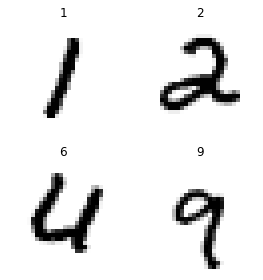

In [23]:
y_pred = np.argmax(model(X_train), axis=-1)

# plot a few predictions
fig = plt.figure(figsize=(4, 4))

for i in range(4):
    fig.add_subplot(2, 2, i+1)
    plot_example(X_train[i+100], y_pred[i+100])

fig.tight_layout()
plt.show()

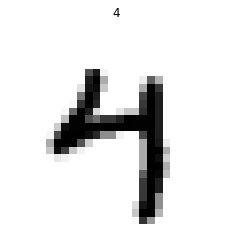

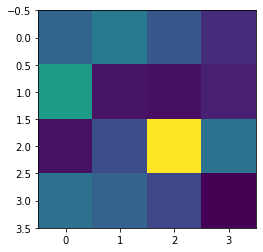

In [24]:
index = 10

plot_example(X_train[index], y_train[index])
plt.show()

# trying to visualize the activation of the first layer
A1 = model.layers[0].forward(X_train[index])
A1 = A1.reshape(4, 4)
plt.imshow(A1)
plt.show()